In [1]:
%matplotlib inline
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import matplotlib.pyplot as plt
import fitsio as ft
from lssutils.lab import AnaFast
import lssutils.utils as ut

In [2]:
from lssutils.dataviz import setup_color
setup_color()

In [3]:
af = AnaFast()

In [4]:
ns = 1024

def get_clss(ns):
    
    p = '/home/mehdi/data/rongpu/imaging_sys/randoms_stats/0.49.0/resolve/'
    dt = ft.read(f'{p}combined/pixmap_north_nside_{ns}_minobs_1_maskbits_1111213.fits')
    
    psfsize_g = ut.make_hp(ns, dt['HPXPIXEL'], dt['PSFSIZE_G'])
    mask = ut.make_hp(ns, dt['HPXPIXEL'], 1.0) > 0.5
    nran = ut.make_hp(ns, dt['HPXPIXEL'], 1.0)
    
    cl_ss = af(psfsize_g, nran, mask)
    return cl_ss['cl']

In [4]:
cl = {}
for ns in [128, 256, 512, 1024]:
    cl[ns] = get_clss(ns)
    print(f'{ns} done')

128 done
256 done
512 done
1024 done


(0, 1500)

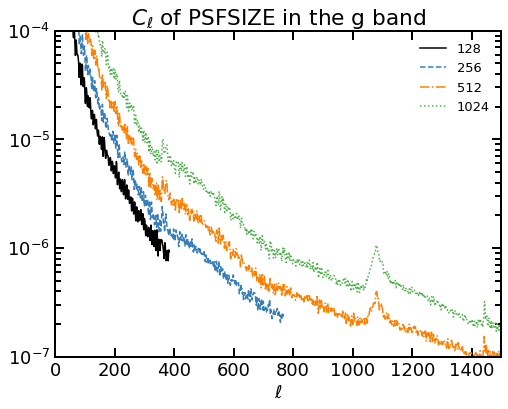

In [32]:
plt.figure(figsize=(8, 6))
plt.title(r'$C_{\ell}$ of PSFSIZE in the g band')
for i, (name, cl_i) in enumerate(cl.items()):
    plt.semilogy((2**i)*cl_i, label=name)
plt.legend()
plt.ylim(1.0e-7, 1.0e-4)
plt.xlabel(r'$\ell$')
plt.xlim(0, 1500)

In [5]:
ns = 1024
p = '/home/mehdi/data/rongpu/imaging_sys/randoms_stats/0.49.0/resolve/'
dt = ft.read(f'{p}combined/pixmap_north_nside_{ns}_minobs_1_maskbits_1111213.fits')

In [6]:
ra, dec = ut.hpix2radec(ns, dt['HPXPIXEL'])

In [7]:
import numpy as np

In [8]:
def sin(deg):
    return np.sin(np.deg2rad(deg))

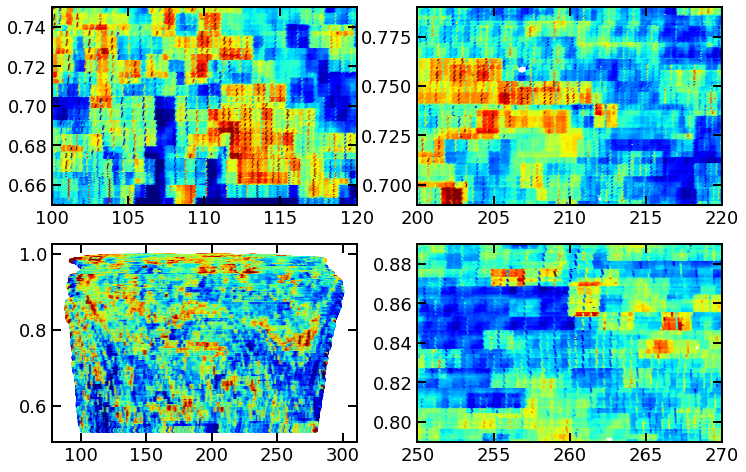

In [58]:
syst = 'PSFSIZE_G'

vmin, vmax = np.percentile(dt[syst], [1, 99])

fg, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
ax = ax.flatten()


kw = dict(c=dt[syst], vmin=vmin, vmax=vmax, marker='H', cmap=plt.cm.jet)
ax[0].scatter(ra, sin(dec), s=14, **kw)
ax[0].axis([100., 120., 0.65, 0.75])

ax[1].scatter(ra, sin(dec), s=8, **kw)
ax[1].axis([200., 220., 0.69, 0.79])

ax[2].scatter(ra, sin(dec), s=8, **kw)
# ax[0].axis([100., 120., sin(40.), sin(50.)])

ax[3].scatter(ra, sin(dec), s=8, **kw)
ax[3].axis([250., 270., 0.79, 0.89])

# fg.savefig('.png', dpi=300, bbox_inches='tight')

In [9]:
dt.dtype.names

('HPXPIXEL',
 'RA',
 'DEC',
 'n_randoms',
 'FRACAREA',
 'EBV',
 'galdepth_gmag',
 'galdepth_rmag',
 'galdepth_zmag',
 'psfdepth_gmag',
 'psfdepth_rmag',
 'psfdepth_zmag',
 'psfdepth_w1mag',
 'psfdepth_w2mag',
 'galdepth_gmag_ebv',
 'galdepth_rmag_ebv',
 'galdepth_zmag_ebv',
 'psfdepth_gmag_ebv',
 'psfdepth_rmag_ebv',
 'psfdepth_zmag_ebv',
 'psfdepth_w1mag_ebv',
 'psfdepth_w2mag_ebv',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'STARDENS')

[250.0, 270.0, 0.79, 0.89]

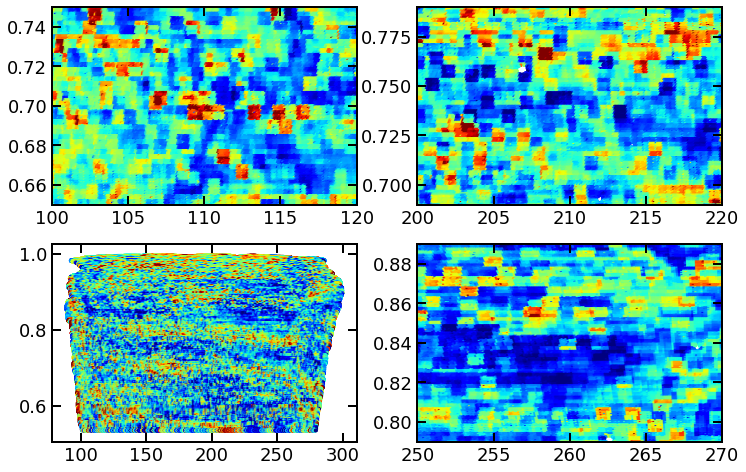

In [10]:
syst = 'PSFSIZE_Z'

vmin, vmax = np.percentile(dt[syst], [1, 99])

fg, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
ax = ax.flatten()


kw = dict(c=dt[syst], vmin=vmin, vmax=vmax, marker='H', cmap=plt.cm.jet)
ax[0].scatter(ra, sin(dec), s=14, **kw)
ax[0].axis([100., 120., 0.65, 0.75])

ax[1].scatter(ra, sin(dec), s=8, **kw)
ax[1].axis([200., 220., 0.69, 0.79])

ax[2].scatter(ra, sin(dec), s=8, **kw)
# ax[0].axis([100., 120., sin(40.), sin(50.)])

ax[3].scatter(ra, sin(dec), s=8, **kw)
ax[3].axis([250., 270., 0.79, 0.89])

# fg.savefig('.png', dpi=300, bbox_inches='tight')

[250.0, 270.0, 0.79, 0.89]

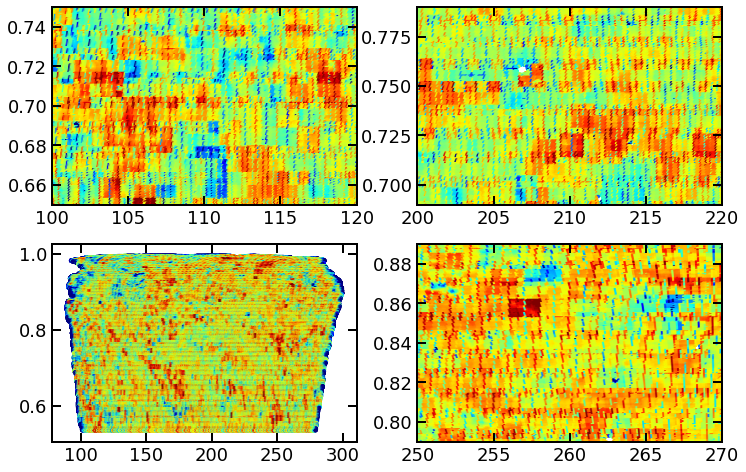

In [11]:
syst = 'galdepth_gmag_ebv'

vmin, vmax = np.percentile(dt[syst], [1, 99])

fg, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
ax = ax.flatten()


kw = dict(c=dt[syst], vmin=vmin, vmax=vmax, marker='H', cmap=plt.cm.jet)
ax[0].scatter(ra, sin(dec), s=14, **kw)
ax[0].axis([100., 120., 0.65, 0.75])

ax[1].scatter(ra, sin(dec), s=8, **kw)
ax[1].axis([200., 220., 0.69, 0.79])

ax[2].scatter(ra, sin(dec), s=8, **kw)
# ax[0].axis([100., 120., sin(40.), sin(50.)])

ax[3].scatter(ra, sin(dec), s=8, **kw)
ax[3].axis([250., 270., 0.79, 0.89])

# fg.savefig('.png', dpi=300, bbox_inches='tight')

## Test Power

In [63]:
mask_bmzls = ut.make_hp(1024, dt['HPXPIXEL'], 1.0) > 0.5

In [64]:
mask = np.ones(12*1024*1024)

In [70]:
gaussian_noise = np.random.normal(size=mask.size)

In [74]:
af = AnaFast()
cl_full = af(mask, mask, mask > 0.5)
cl_bmzls = af(mask, mask, mask_bmzls)

Text(0, 0.5, 'C$_{\\ell}$')

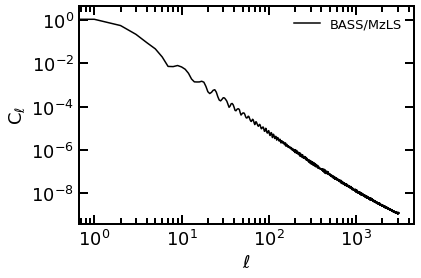

In [80]:
# plt.plot(cl_full['cl'], label='Full Sky')
plt.plot(cl_bmzls['cl'], label='BASS/MzLS')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')